# 法律 RAG Notebook 工作流
此 Notebook 示範如何以模組化方式載入 `rag_system` Workflow，替代舊有 CLI。
1. 載入環境變數並建立 `RAGConfig`。
2. 透過 `rag_system.workflow` 建立 LLM 與 LangGraph Workflow。
3. 以程式方式執行查詢並顯示答案。

In [1]:
import sys
import os

# Ensure project root is in python path
current_dir = os.getcwd()
if current_dir.endswith("notebooks"):
    sys.path.append(os.path.abspath(".."))
elif "rag_system" not in os.listdir(current_dir):
    # Fallback try
    sys.path.append(os.path.abspath("."))

from dotenv import load_dotenv
from rag_system.config import RAGConfig
from rag_system.workflow import create_llm, create_rag_workflow, run_query

load_dotenv()
config = RAGConfig.from_env()
config.validate()

/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(


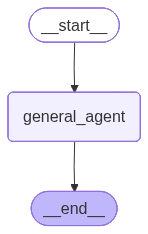

In [2]:
llm = create_llm(config)
workflow = create_rag_workflow(config, llm=llm, use_hierarchical=True)  # 開啟階層式
workflow

In [3]:
from rag_system.common import set_quiet_mode

set_quiet_mode(False)  # 開啟日誌
# set_quiet_mode(True)  # 再次關閉

In [4]:
result_state = run_query(  "陸海空軍懲罰法第7條",
  config,
  llm=llm,
  use_hierarchical=True
)
print(result_state["generation"])

2025-12-01 07:01:49,791 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-01 07:01:49,804 - INFO - rag_system.common - Running workflow for question: 陸海空軍懲罰法第7條
2025-12-01 07:01:49,804 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-01 07:01:50,166 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:01:50,171 - INFO - rag_system.common - Routing legal query: '陸海空軍懲罰法第7條'
2025-12-01 07:01:50,181 - INFO - rag_system.common - Found collections with stats: [{'name': '陸海空軍懲罰法', 'doc_count': 86}, {'name': '軍人權益事件處理法', 'doc_count': 85}, {'name': '軍人權益事件處理法-checkpoint', 'doc_count': 85}]
2025-12-01 07:01:50,507 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:01:50,508 - I

**問題答案**  
陸海空軍懲罰法第7條規定了違紀行為的懲罰原則，內容如下：

> **第 7 條**  
> 1. 違紀行為之懲罰，以行為時本法有明文規定者為限。  
> 2. 行為後本法或應適用之法令有變更者，適用行為時之規定。但行為後之規定有利於行為人者，適用最有利於行為人之規定。

這表示：  
- 懲罰必須依照行為發生時的法條規定；  
- 若行為後法令有所變更，仍以行為時的規定為準；  
- 但若行為後的規定對行為人更有利，則應適用最有利於行為人的規定。

**結論**  
第7條確立了「行為時適用」的原則，並在行為後法令變更時保留對行為人最有利的適用方式。

**參考資料**  
- 來源: 陸海空軍懲罰法.md  
  - 條文: 第 7 條


In [5]:
question = "懲罰法適用對象"
result_state = run_query(question, config, llm=llm)
print(result_state.get("generation", "尚未產生答案"))

2025-12-01 07:01:53,866 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-01 07:01:53,878 - INFO - rag_system.common - Running workflow for question: 懲罰法適用對象
2025-12-01 07:01:53,879 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-01 07:01:54,816 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:01:54,818 - INFO - rag_system.common - Routing legal query: '懲罰法適用對象'
2025-12-01 07:01:54,824 - INFO - rag_system.common - Found collections with stats: [{'name': '陸海空軍懲罰法', 'doc_count': 86}, {'name': '軍人權益事件處理法', 'doc_count': 85}, {'name': '軍人權益事件處理法-checkpoint', 'doc_count': 85}]
2025-12-01 07:01:55,262 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:01:55,263 - INFO - 

**問題答案**  
《陸海空軍懲罰法》規定，該法的適用對象為「軍人」及其在服現役期間所犯之違紀行為。具體條文如下：

- **第 2 條**  
  1. 「軍人違紀行為之懲罰，除其他法律另有規定外，依本法行之。」  
  2. 「本法規定，對喪失現役軍人身分者於服現役期間之行為，亦適用之。」  
  這段文字明確指出，任何在服現役期間（即使已喪失現役軍人身分）所犯的違紀行為，都屬於本法的適用範圍。

- **第 4 條**（用詞定義）  
  1. 「違紀行為：指軍人於服現役期間，違反勤務上或勤務外紀律規範之行為。」  
  這裡將「軍人」與「服現役期間」作為適用對象的核心條件。

- **第 19 條**（懲罰種類）  
  1. 「軍人之懲罰依其身分，區分如下：軍官、士官、士兵各有不同的懲罰項目。」  
  這段說明了在本法適用範圍內，對不同身分的軍人可採取的懲罰措施。

綜合上述條文，**《陸海空軍懲罰法》適用於所有在服現役期間的軍人（含已喪失現役身分但行為發生於服役期間者），對其違紀行為進行懲罰。**

**結論**  
《陸海空軍懲罰法》主要針對在服現役期間的軍人（包括已喪失現役身分但行為發生於服役期間者）所犯的違紀行為，並依其身分（軍官、士官、士兵）規定相應的懲罰措施。

**參考資料**  
- 來源: 陸海空軍懲罰法.md  
  - 條文: 第 2 條  
  - 條文: 第 4 條  
  - 條文: 第 19 條


In [6]:
question = "修法後的懲罰種類有哪些"
result_state = run_query(question, config, llm=llm)
print(result_state.get("generation", "尚未產生答案"))

2025-12-01 07:02:02,985 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-01 07:02:02,999 - INFO - rag_system.common - Running workflow for question: 修法後的懲罰種類有哪些
2025-12-01 07:02:03,000 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-01 07:02:04,456 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:02:04,458 - INFO - rag_system.common - Routing legal query: '修法後的懲罰種類'
2025-12-01 07:02:04,464 - INFO - rag_system.common - Found collections with stats: [{'name': '陸海空軍懲罰法', 'doc_count': 86}, {'name': '軍人權益事件處理法', 'doc_count': 85}, {'name': '軍人權益事件處理法-checkpoint', 'doc_count': 85}]
2025-12-01 07:02:04,912 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:02:04,913 - IN

**問題答案**  
修法後的《陸海空軍懲罰法》將軍人之懲罰分為三大類，具體內容如下（見第 18 條）：

1. **人事懲罰**：撤職、廢止起役、降階、記過及申誡。  
2. **財產懲罰**：剝奪或減少退除給與、降級、罰薪及罰款。  
3. **紀律懲罰**：悔過、檢束、禁足、罰勤及罰站。  

這三類懲罰涵蓋了從人事、財產到紀律層面的各種處分方式，並在修法後作了明確分類與列舉。

**結論**  
修法後的懲罰種類共分為人事懲罰、財產懲罰與紀律懲罰三類，並列出具體的處分項目。

**參考資料**  
- 來源: 陸海空軍懲罰法.md  
  - 條文: 第 18 條


In [7]:
question = "懲罰權可以行使的期限為何？"
result_state = run_query(question, config, llm=llm)
print(result_state.get("generation", "尚未產生答案"))

2025-12-01 07:02:08,782 - INFO - rag_system.common - Using hierarchical retrieval system
/home/jovyan/work/rag_system/common.py:76: UserWarning: SSL verification is disabled. This is insecure and should only be used for development.
  warnings.warn(
2025-12-01 07:02:08,795 - INFO - rag_system.common - Running workflow for question: 懲罰權可以行使的期限為何？
2025-12-01 07:02:08,795 - INFO - rag_system.common - --- GENERAL AGENT NODE ---
2025-12-01 07:02:10,793 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:02:10,795 - INFO - rag_system.common - Routing legal query: '懲罰權 可以 行使 的 期限 為 何'
2025-12-01 07:02:10,801 - INFO - rag_system.common - Found collections with stats: [{'name': '陸海空軍懲罰法', 'doc_count': 86}, {'name': '軍人權益事件處理法', 'doc_count': 85}, {'name': '軍人權益事件處理法-checkpoint', 'doc_count': 85}]
2025-12-01 07:02:11,284 - INFO - httpx - HTTP Request: POST http://172.16.120.67:7000/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-01 07:02

**問題答案**  
根據《陸海空軍懲罰法》第34條的規定，若懲戒案件或違紀事件在下列期間內未繫屬懲戒法院或未作成懲罰處分，則「懲戒權或懲罰權不得行使」。  
因此，懲罰權可行使的期限（即不得行使的禁期）為：

| 罰則類別 | 禁止行使期限 |
|----------|--------------|
| 重大人事懲罰及重大財產懲罰 | 10 年 |
| 前款以外之人事及財產懲罰 | 5 年 |
| 悔過 | 1 年 |
| 罰勤、檢束及禁足 | 3 個月 |
| 罰站 | 1 個月 |

換句話說，只有在上述禁期結束後，才可行使懲罰權。

**結論**  
《陸海空軍懲罰法》第34條明確列出懲罰權不得行使的禁期，分別為10年、5年、1年、3個月及1個月。  

**參考資料**  
- 來源：《陸海空軍懲罰法.md》  
  - 條文：第34條（含禁期規定）
